## Hand Written Number Dedection

In [2]:
from sklearn.datasets import load_digits
from sklearn import svm, metrics
digits = load_digits()
x = digits.data
y = digits.target
feature_names = digits.feature_names
#It shows the Numbers of that images which we are going to use 
target_names = digits.target_names
print("Feature Names : " , feature_names)
print("Target Names : " , target_names)
print("\nFirst 10 rows of X:\n" , x[:10])

Feature Names :  ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']
Target Names :  [0 1 2 3 4 5 6 7 8 9]

First 10 rows of X:
 [[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11

In [3]:
digits.data.shape # Shape of your array

(1797, 64)

## List of images we have

<Figure size 640x480 with 0 Axes>

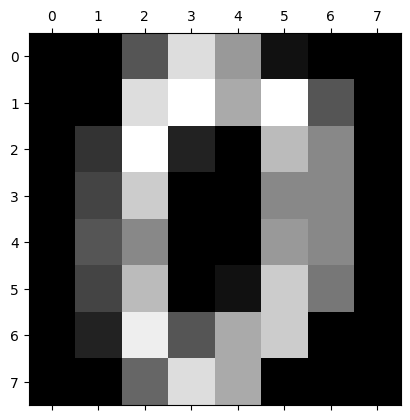

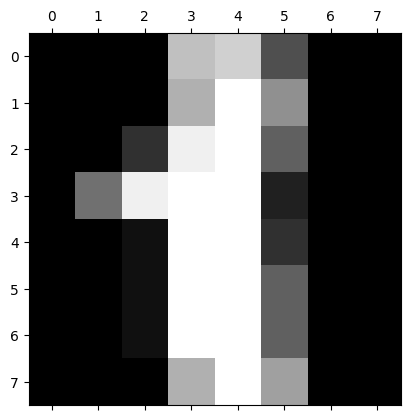

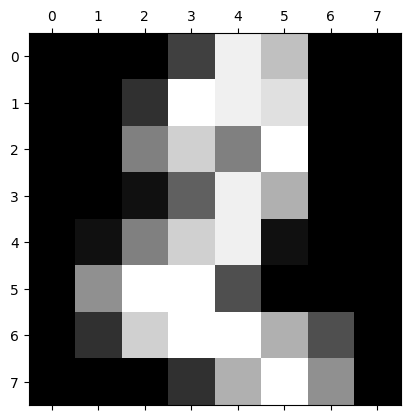

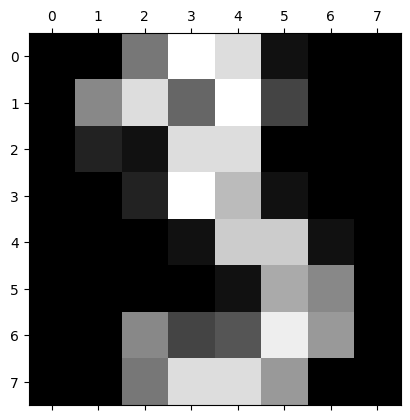

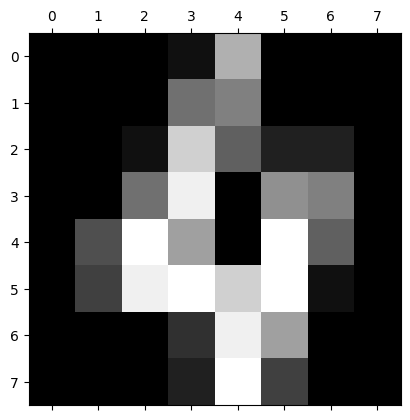

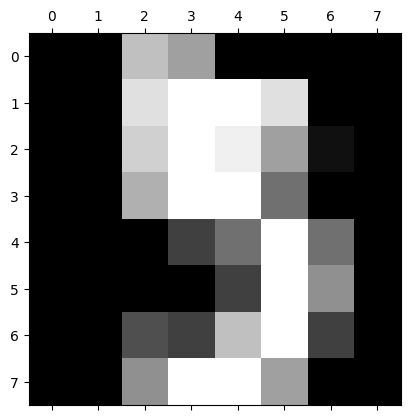

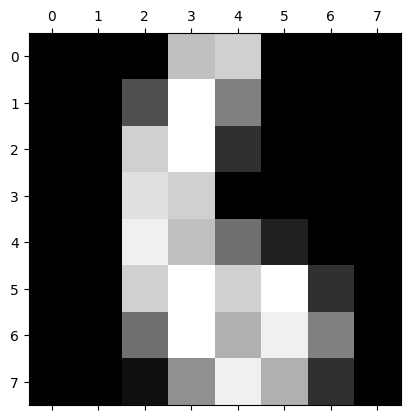

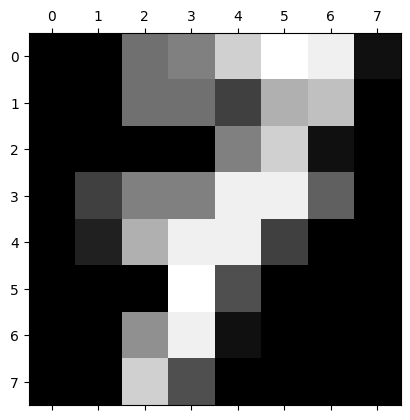

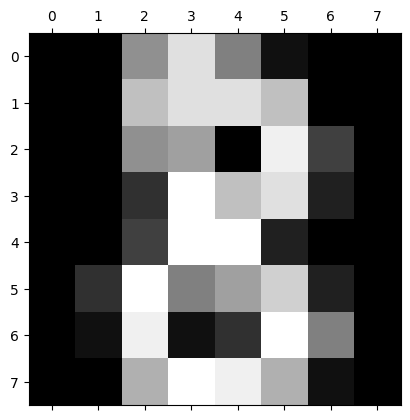

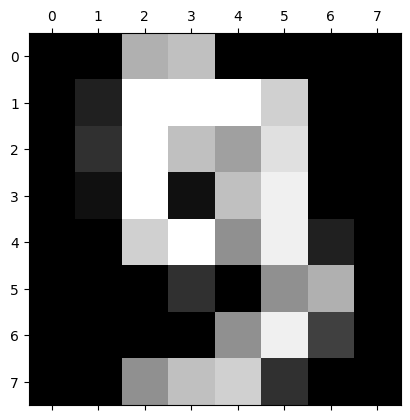

In [4]:
import matplotlib.pyplot as plt
plt.gray()
#Display All the pictures we are going to use
for i in range(0,10):
    plt.matshow(digits.images[i])
    plt.show()
    i= i+1

## Training the Model

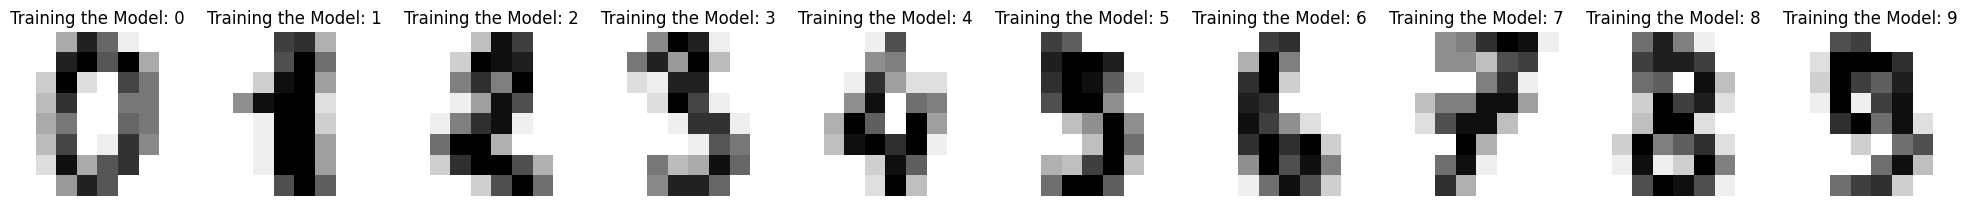

In [5]:
digits = load_digits()
#We are going to Train our Model
_, sub_axes = plt.subplots(nrows=1, ncols=10, figsize=(25, 7))
for ax_to_show, image, label in zip(sub_axes, digits.images, digits.target):
    ax_to_show.set_axis_off()
    ax_to_show.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax_to_show.set_title("Training the Model: %i" % label)


In [6]:
# flatten the images
from sklearn.model_selection import train_test_split
new_samples = len(digits.images)
data = digits.images.reshape((new_samples, -1))

# Create a classifier: a support vector classifier
classify = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=True
)

# Learn the digits on the train subset
classify.fit(X_train, y_train)

# Prediction is under way by the model
predicted = classify.predict(X_test)

## Predicted Value is Here

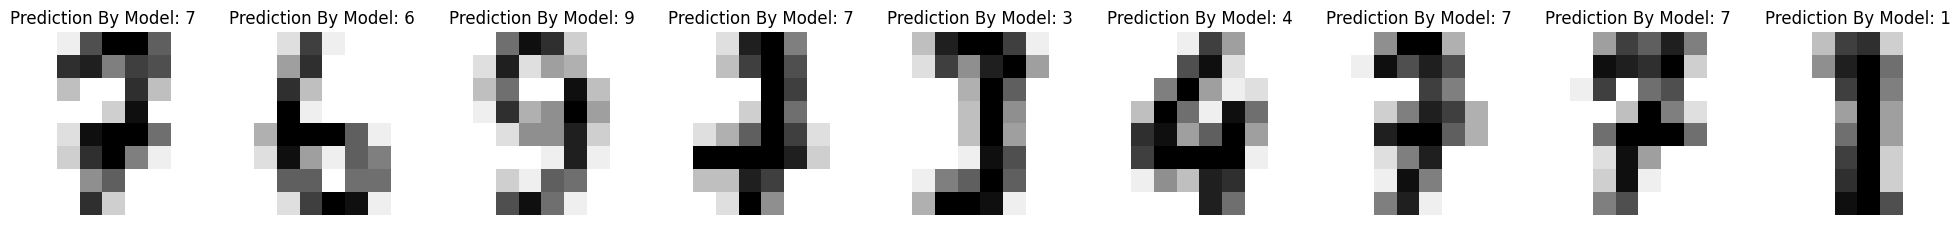

In [7]:
_, axes = plt.subplots(nrows=1, ncols=9, figsize=(25, 3))
for ax_to_show, image, prediction in zip(axes, X_test, predicted):
    ax_to_show.set_axis_off()
    image = image.reshape(8, 8)
    ax_to_show.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    #Final predicted results
    ax_to_show.set_title(f"Prediction By Model: {prediction}")

## Confusion Metric of Prediction

Confusion matrix:
[[90  0  0  0  1  0  0  0  0  0]
 [ 0 84  0  0  0  0  0  0  0  0]
 [ 0  0 96  0  0  0  0  0  0  0]
 [ 0  0  0 75  0  0  0  0  0  0]
 [ 0  0  0  0 88  0  0  0  2  1]
 [ 0  0  0  0  0 89  1  0  0  1]
 [ 0  0  0  0  0  0 82  0  0  0]
 [ 0  0  0  0  0  0  0 95  0  1]
 [ 0  3  0  0  0  0  0  0 93  0]
 [ 0  0  0  0  0  1  0  0  0 96]]


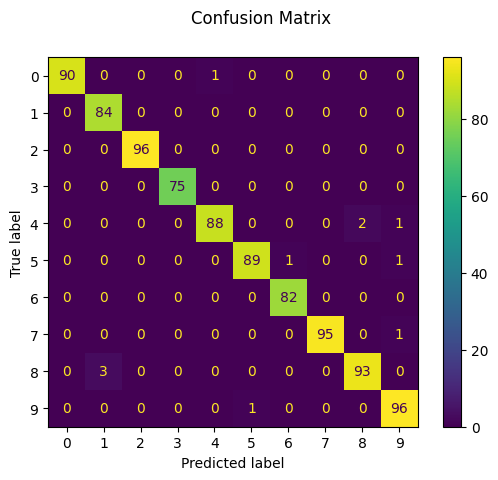

In [8]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
#Confusion Matric (difference between Original Value and Predicted value estimation by the model)
plt.show()

## Allah Hafiz